> # **Logistic Regression**
> Logistic regression is a way to predict the probability of an event happening or not happening, based on some given data. It’s like trying to guess the outcome of a coin toss, but instead of just flipping a coin, you’re using data to make a more informed decision.<br><br>
> `Key Points` - 
>  - `Logistic regression is used for binary data` (data that can only be one of two values, like yes/no or 0/1).
>  - It’s a way to predict the probability of an event occurring, based on given data.
>  - The formula created by logistic regression is simple and easy to understand, making it a powerful tool for making predictions.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score, classification_report

In [2]:
X, y = make_classification(
    n_samples=200, # Number of samples to generate.
    n_features=2, # Total number of features (or variables) for each sample.
    n_informative=1, # Out of the 2 features, only 1 feature will be genuinely informative for the classification task. The informative features are the ones that contribute to distinguishing between classes.
    n_redundant=0, # There are no redundant features. Redundant features are combinations of informative features that are used to create new features but do not provide additional information.
    n_classes=2, # The dataset will have 2 classes. This is a binary classification problem.
    n_clusters_per_class=1, # Each class will be represented by a single cluster. This means that the data points for each class will be grouped into one distinct cluster.
    random_state=23, # seed 
    hypercube=False, # If False, the data is not generated from a hypercube but rather from a Gaussian distribution.
    class_sep=7 # Separation between classes.
)

df = pd.DataFrame(X)
df.rename(columns={0: 'X1', 1: 'X2'}, inplace=True)
df['y'] = y
df.head()

,X1,X2,y
0,0.253384,-1.675126,0
1,2.187397,-1.815573,0
2,0.814971,4.350718,1
3,-0.613510,-5.702354,0
4,0.569810,-1.903335,0


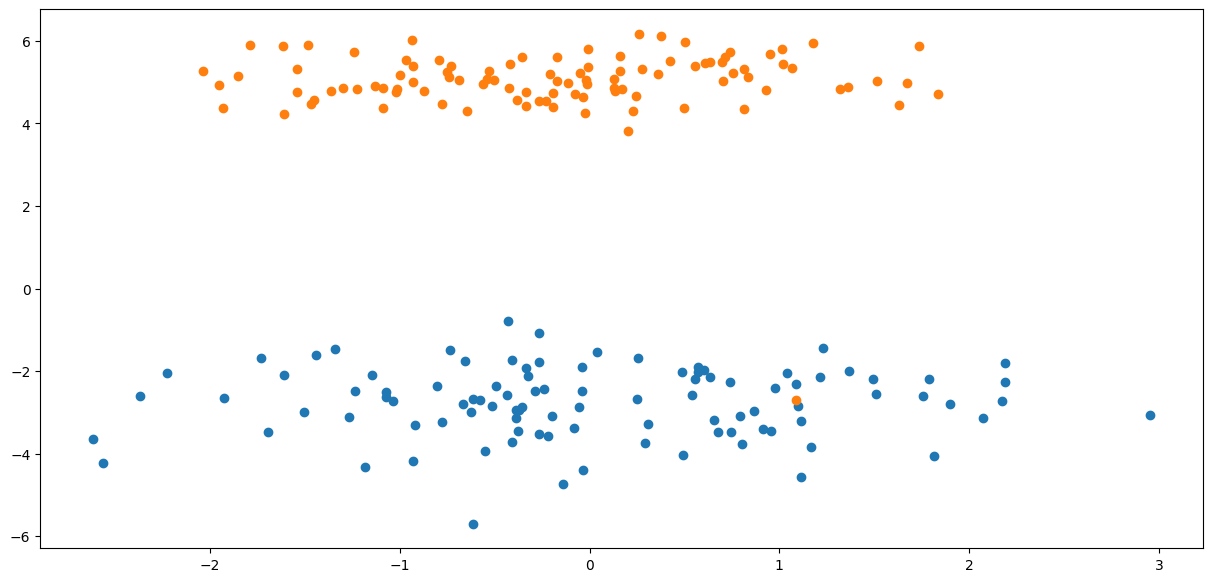

In [3]:
category0 = df[df['y'] == 0]
category1 = df[df['y'] == 1]

plt.figure(figsize=(15, 7))
plt.scatter(category0['X1'], category0['X2'], label = 'category 0')
plt.scatter(category1['X1'], category1['X2'], label = 'category 1')
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<hr>

> ### PERCEPTRON APPROACH
>- The Perceptron algorithm aims to find a hyperplane that separates two classes in the feature space.<br><br>
>- A Perceptron computes a weighted sum of the input features and passes it through an activation function to produce a binary output.<br><br>
>- The Perceptron algorithm iteratively updates the weights based on the classification errors made on the training data.<br><br>
>- While the Perceptron algorithm is designed for binary classification, Logistic Regression extends this concept with probabilistic outputs and a more sophisticated loss function.

In [22]:
class Perceptron:
    def __init__(self, lr=0.001, n_iterations=1000):
        self.coef_ = None
        self.intercept_ = None
        self.lr = lr
        self.n_iterations = n_iterations
    
    def _predict_single(self, X):
        """Compute the prediction for a single data point."""
        return 1 if np.dot(X, self.coef_) + self.intercept_ >= 0 else 0

    def fit(self, X_train, y_train):
        """Fit the perceptron model to the training data."""
        n_samples, n_features = X_train.shape
        self.coef_ = np.zeros(n_features)
        self.intercept_ = 0

        for _ in range(self.n_iterations):
            idx = np.random.randint(0, n_samples)
            X_sample = X_train[idx]
            y_sample = y_train[idx]
            
            y_hat = self._predict_single(X_sample)
            error = y_sample - y_hat
            
            self.coef_ += self.lr * error * X_sample
            self.intercept_ += self.lr * error
    
    def predict(self, X_test):
        """Predict the class labels for the given test data."""
        return np.array([self._predict_single(x) for x in X_test])

In [23]:
model = Perceptron(0.01, 2000)
model.fit(X_train, y_train)
print(model.coef_, model.intercept_)

[-0.00601519  0.01968829] -0.01


In [24]:
m_perceptron = -model.coef_[0]/model.coef_[1]
b_perceptron = -model.intercept_/model.coef_[1]

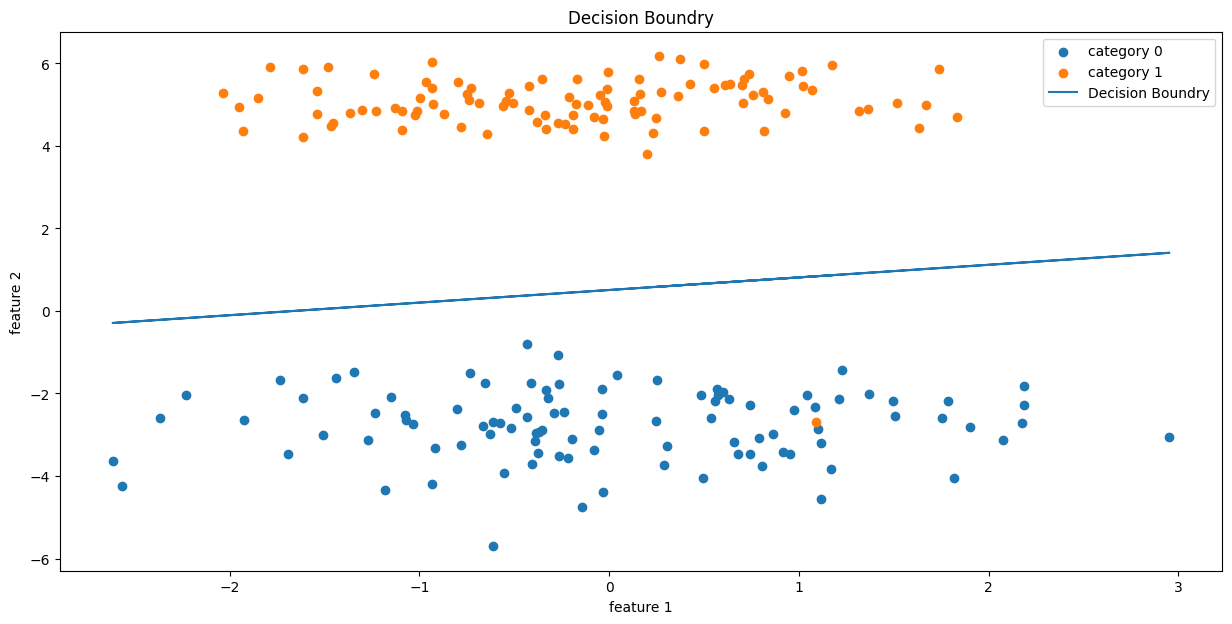

In [25]:
category0 = df[df['y'] == 0]
category1 = df[df['y'] == 1]

plt.figure(figsize=(15, 7))

plt.scatter(category0['X1'], category0['X2'], label = 'category 0')
plt.scatter(category1['X1'], category1['X2'], label = 'category 1')
plt.plot(df['X1'], m_perceptron * df['X1'] + b_perceptron, label = "Decision Boundry")

plt.title("Decision Boundry")
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()

plt.show()

<hr>

> ### SIGMOID FUNCTION APPROACH
> The sigmoid function maps any real-valued number (Y_HAT) into a value between 0 and 1, which can be `interpreted as a probability`.<BR><BR>
> 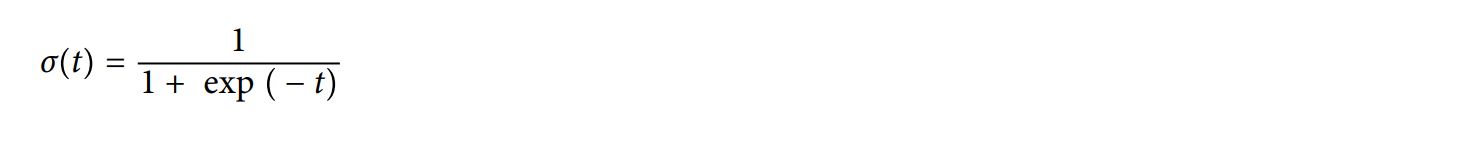

In [26]:
class LogisticRegressionSigmoid:
    def __init__(self, lr=0.001, n_iterations=1000):
        self.coef_ = None
        self.intercept_ = None
        self.lr = lr
        self.n_iterations = n_iterations
    
    def sigmoid(self, X):
        """Compute the prediction for a single data point."""
        prediction = np.dot(X, self.coef_) + self.intercept_
        return 1 / (1 + np.exp(-prediction))

    def fit(self, X_train, y_train):
        """Fit the perceptron model to the training data."""
        n_samples, n_features = X_train.shape
        self.coef_ = np.zeros(n_features)
        self.intercept_ = 0

        for _ in range(self.n_iterations):
            idx = np.random.randint(0, n_samples)
            X_sample = X_train[idx]
            y_sample = y_train[idx]
            
            y_hat = self.sigmoid(X_sample)
            error = y_sample - y_hat
            
            self.coef_ += self.lr * error * X_sample
            self.intercept_ += self.lr * error
    
    def predict(self, X_test):
        """Predict the class labels for the given test data."""
        y_pred = []
        for i in X_test:
            y_pred.append(1 if self.sigmoid(i) >= 0.5 else 0)
        return np.array(y_pred)

In [27]:
model = LogisticRegressionSigmoid(0.1, 5000)
model.fit(X_train, y_train)
print(model.coef_, model.intercept_)

[0.07333803 2.79308314] -1.174485244013743


In [28]:
m_sigmoid = -model.coef_[0]/model.coef_[1]
b_sigmoid = -model.intercept_/model.coef_[1]

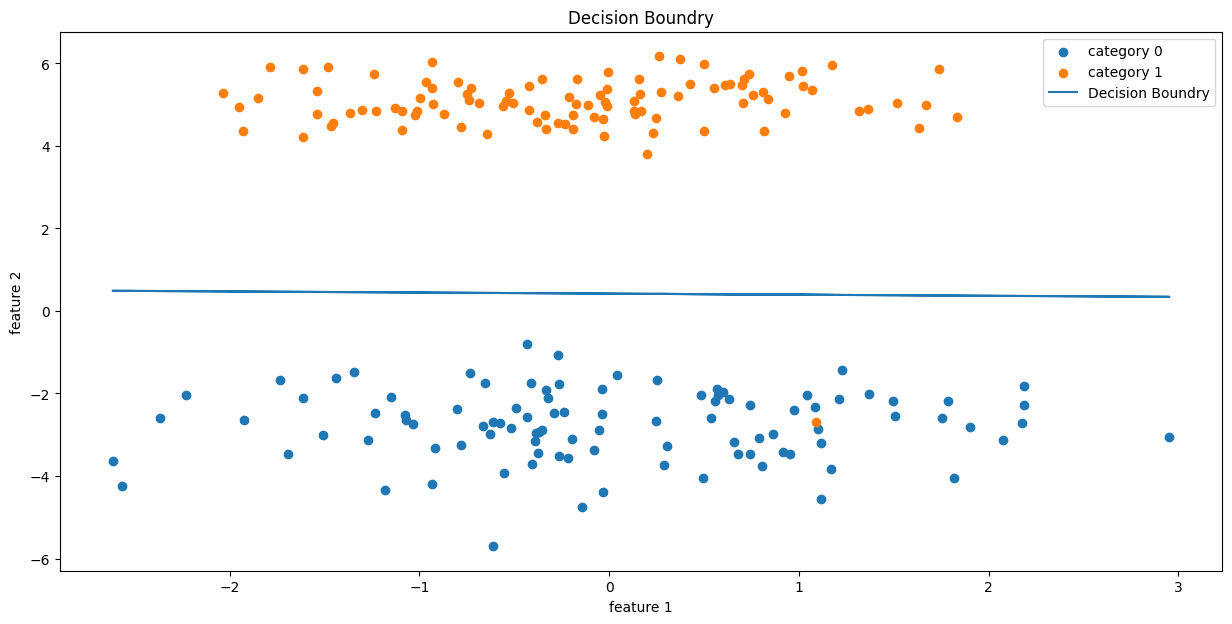

In [29]:
category0 = df[df['y'] == 0]
category1 = df[df['y'] == 1]

plt.figure(figsize=(15, 7))

plt.scatter(category0['X1'], category0['X2'], label = 'category 0')
plt.scatter(category1['X1'], category1['X2'], label = 'category 1')
plt.plot(df['X1'], m_sigmoid * df['X1'] + b_sigmoid, label = "Decision Boundry")

plt.title("Decision Boundry")
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()

plt.show()

<hr>

> ### Perceptron vs Logistic Regression
> - While the Perceptron algorithm is designed for binary classification, Logistic Regression extends this concept with `"probabilistic - SIGMOID FUNCTION" outputs and a more sophisticated "LOSS FUNCTION"`
<br><br>
> - Due to this `loss function` Logistic Regression actually able to identify the the perfect Line/Hyperplane at which there is global minima (minimum loss).
<br><br>
> - Logistic Regression is a statistical model that estimates probabilities using a logistic function. Unlike the Perceptron, which provides a binary output, Logistic Regression provides a "probability that a given input belongs to a particular class".
<br><br>

> ### Sigmoid vs Logistic Regression
> - `No Optimization`: The sigmoid function alone does not provide a mechanism for training the model. Logistic Regression requires an optimization process to find the best weights and bias.
<br><br>
> - `No Loss Function`: The sigmoid function outputs probabilities but does not measure the accuracy of the model. Logistic Regression uses a loss function to quantify the difference between predicted probabilities and actual outcomes.

<hr>

> ### `LogisticRegression` - sklearn inbuilt class

> Hyperparameters:
> - penalty: regularization  
> - class_weight : Weights associated with classes in the form {class_label: > weight}. If not given, all classes are supposed to have weight one.
> - solver : sag (Our formula)
> - max_iter : 1000
> - multi_class : If the problem is multiclass 
> - l1_ratio : ElasticNet regularization

In [139]:
model = LogisticRegression(
            solver='sag', # Stocastic avg Gradient (SGD)
            max_iter=5000,
            multi_class='auto',
        )
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000, solver='sag')

In [140]:
print(model.intercept_, model.coef_)

[-2.07166096] [[-0.03290275  1.60732127]]


In [141]:
model_m = -model.coef_[0, 0]/model.coef_[0, 1]
model_b = -model.intercept_[0]/model.coef_[0, 1]

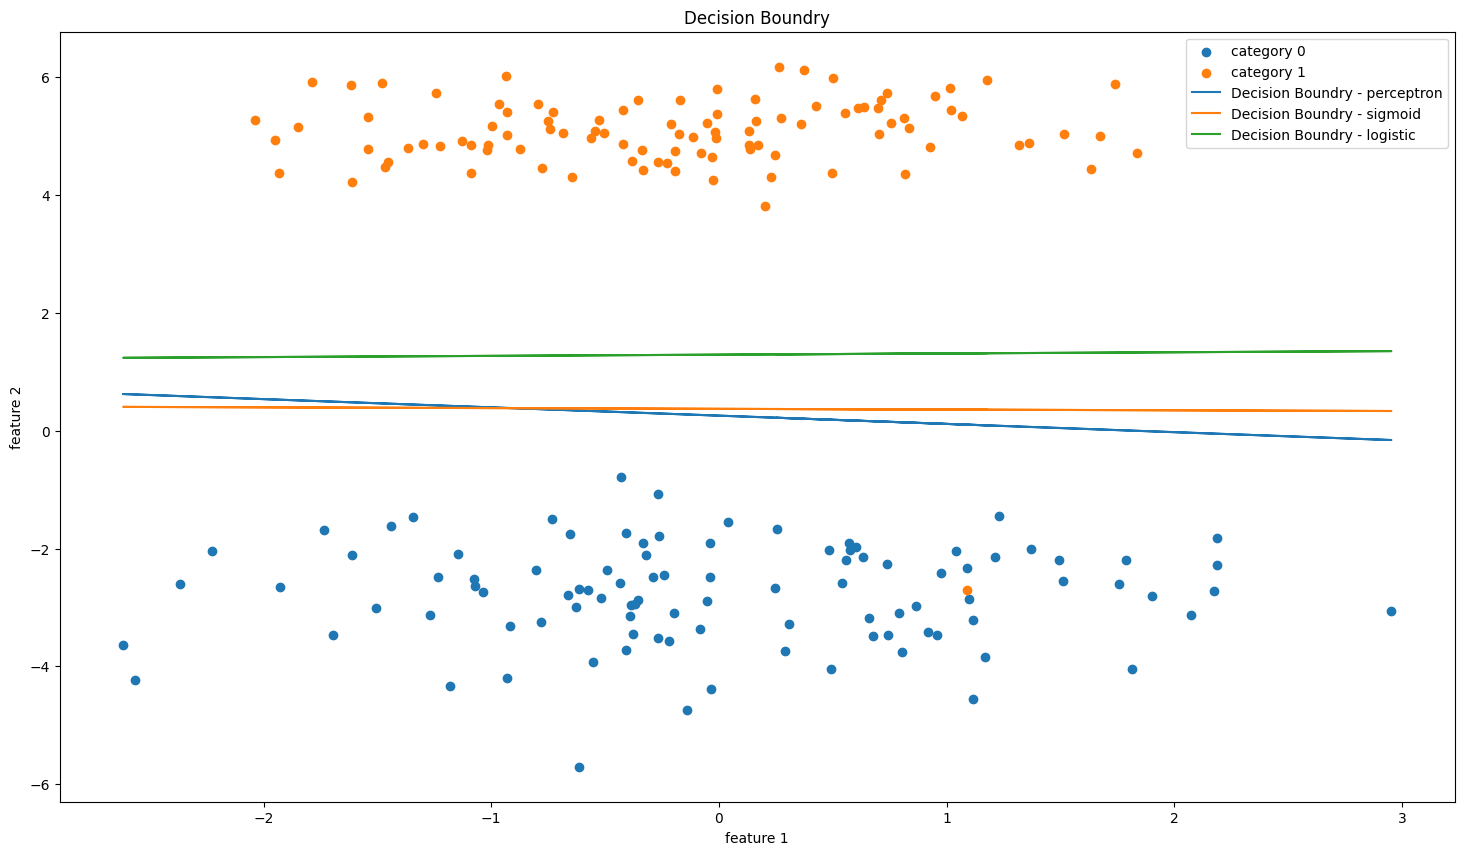

In [144]:
category0 = df[df['y'] == 0]
category1 = df[df['y'] == 1]

plt.figure(figsize=(18, 10))

plt.scatter(category0['X1'], category0['X2'], label = 'category 0')
plt.scatter(category1['X1'], category1['X2'], label = 'category 1')

plt.plot(df['X1'], m_perceptron * df['X1'] + b_perceptron, label = "Decision Boundry - perceptron")
plt.plot(df['X1'], m_sigmoid * df['X1'] + b_sigmoid, label = "Decision Boundry - sigmoid")
plt.plot(df['X1'], model_m * df['X1'] + model_b, label = "Decision Boundry - logistic")

plt.title("Decision Boundry")
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()

plt.show()

> ### OBSERVATIONS
> - As you can see the `inbuilt classifier` classify both the categories `symmetrically`.<br><br>
> - `Perceptrone` approach somehow able to classify both the categories but `not symmetrically` at all - Not `generalized`.<br><br>
> - `Sigmoid function` approach able to classify both the categories but `not as symmetrically` as LogisticRegressor did`.

<hr>

> ### Logistic Regression using `Stocastic Gradient Descent`
> `Loss Function` : <br><br>
> 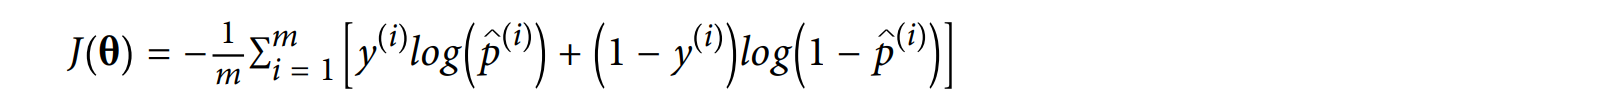
> `Gradient` : <br><br>
> 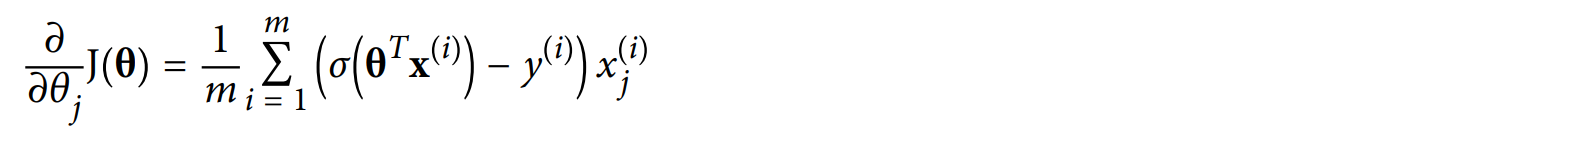

In [210]:
class GradientDescent:
    def __init__(self, lr=0.01, epochs=1000) -> None:
        self.coef_ = None
        self.intercept_ = None
        self.epochs = epochs
        self.learning_rate = lr
    
    def sigmoid(self, z):
        # Ensure numerical stability
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X_train, y_train):       
        # Insert 1 to X_train for intercept term
        X_train = np.insert(X_train, 0, 1, axis=1)
        y_train = y_train.reshape(-1, 1)

        # Initialize weights with zeros
        weights_ = np.zeros((X_train.shape[1], 1))

        for _ in range(self.epochs):
            # Shuffle the data
            indices = np.arange(X_train.shape[0])
            np.random.shuffle(indices)
            
            for i in indices:
                # Generate the sample
                X_sample = X_train[i:i+1]
                y_sample = y_train[i:i+1]

                # Calculate y_hat
                y_hat = self.sigmoid(np.dot(X_sample, weights_))

                # Calculate gradient
                gradient_weights_ = np.dot(X_sample.T, (y_sample - y_hat)) / X_train.shape[0]

                # Update weights
                weights_ += self.learning_rate * gradient_weights_

        # Extract coefficients and intercept
        self.coef_ = weights_[1:]
        self.intercept_ = weights_[0]

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)  # Add intercept term
        predictions = self.sigmoid(np.dot(X, np.concatenate(([self.intercept_], self.coef_))))
        return (predictions > 0.5).astype(int)


In [229]:
model = GradientDescent(0.5, 5000)
model.fit(X_train, y_train)
print(model.coef_, model.intercept_)

[[0.17872581]
 [3.49239324]] [-1.57408]


In [230]:
gd_m = -model.coef_[0]/model.coef_[1]
gd_b = -model.intercept_/model.coef_[1]

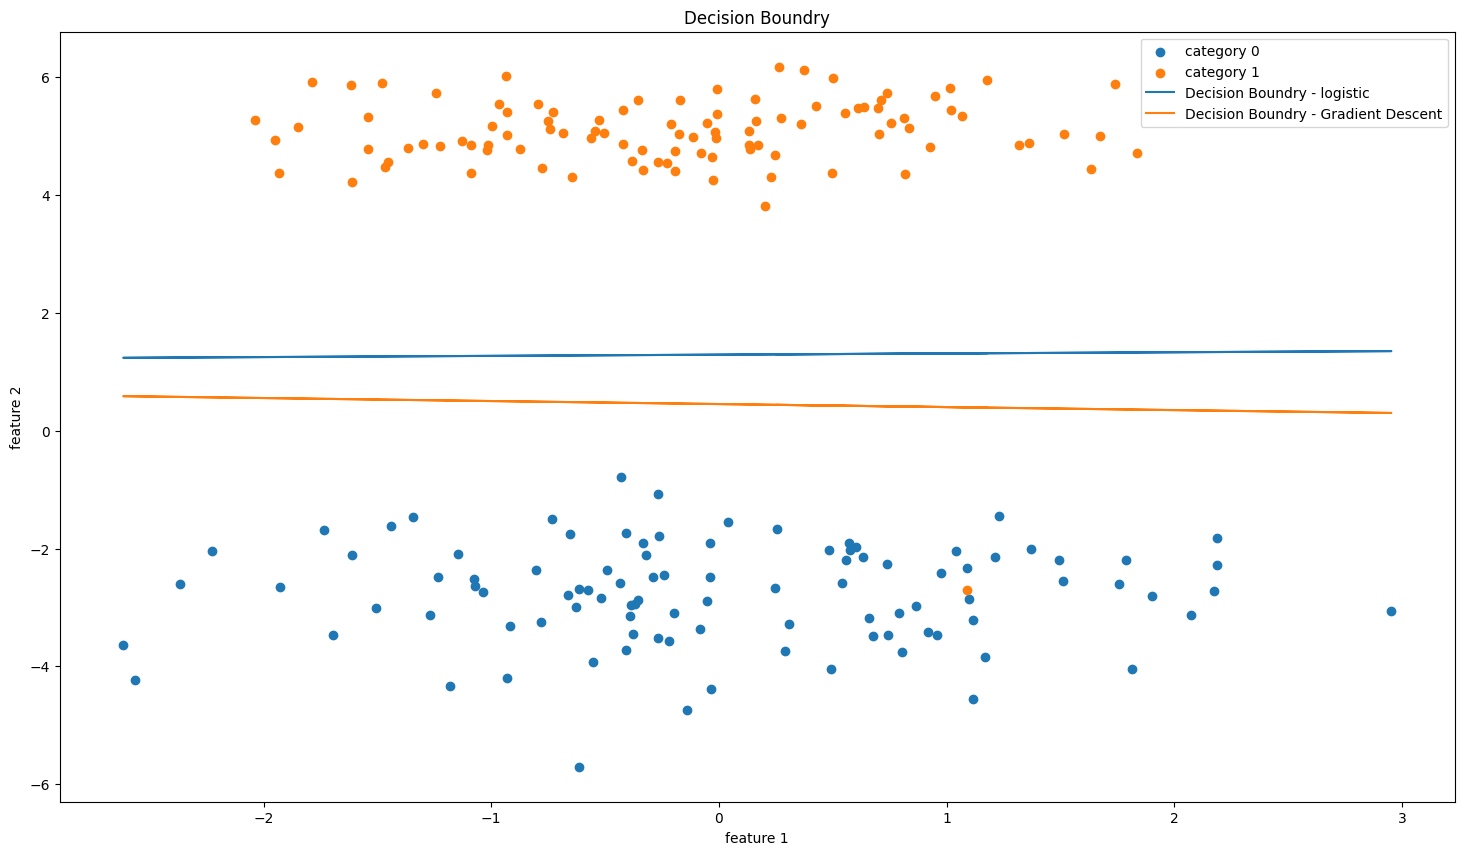

In [232]:
category0 = df[df['y'] == 0]
category1 = df[df['y'] == 1]

plt.figure(figsize=(18, 10))

plt.scatter(category0['X1'], category0['X2'], label = 'category 0')
plt.scatter(category1['X1'], category1['X2'], label = 'category 1')

plt.plot(df['X1'], model_m * df['X1'] + model_b, label = "Decision Boundry - logistic")
plt.plot(df['X1'], gd_m * df['X1'] + gd_b, label = "Decision Boundry - Gradient Descent")

plt.title("Decision Boundry")
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()

plt.show()